In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# **과제 1: PCA 실습**

Iris 데이터를 2D로 축소
→ 설명된 분산 확인 및 시각화


In [53]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [52]:
# 데이터 로드
iris = load_iris()
X = iris.data               # (150, 4)
y = iris.target             # 0,1,2
names = iris.target_names   # ['setosa','versicolor','virginica']
features = iris.feature_names

In [54]:
# 데이터 표준화 (평균 0, 표준편차 1로 맞추기)
# PCA는 스케일(단위)에 민감하므로 반드시 표준화해야한다.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [55]:
X_scaled.shape  # (150, 4)

(150, 4)

In [56]:
# PCA 적용 (n_components=2 2차원으로 줄이기)
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

In [57]:
X_pca.shape # (150, 2) 2차원으로 변경 완료

(150, 2)

In [58]:
# 결과 분산 비율 확인
print("Explained variance ratio (PC1, PC2):", pca.explained_variance_ratio_)
print("Cumulative (PC1+PC2):", pca.explained_variance_ratio_.sum())


Explained variance ratio (PC1, PC2): [0.72962445 0.22850762]
Cumulative (PC1+PC2): 0.9581320720000164


In [59]:
'''
Explained variance ratio (PC1, PC2): [0.72962445 0.22850762]
-> 전체 데이터 분산 중 PC1이 73%, PC2가 23%를 설명한다.

Cumulative (PC1+PC2): 0.9581320720000164
-> 두 값을 더했을 때 값이 90% 이상인 경우 데이터 패턴을 유지한 것으로 판단.
'''

'\nExplained variance ratio (PC1, PC2): [0.72962445 0.22850762]\n-> 전체 데이터 분산 중 PC1이 73%, PC2가 23%를 설명한다.\n\nCumulative (PC1+PC2): 0.9581320720000164\n-> 두 값을 더했을 때 값이 90% 이상인 경우 데이터 패턴을 유지한 것으로 판단.\n'

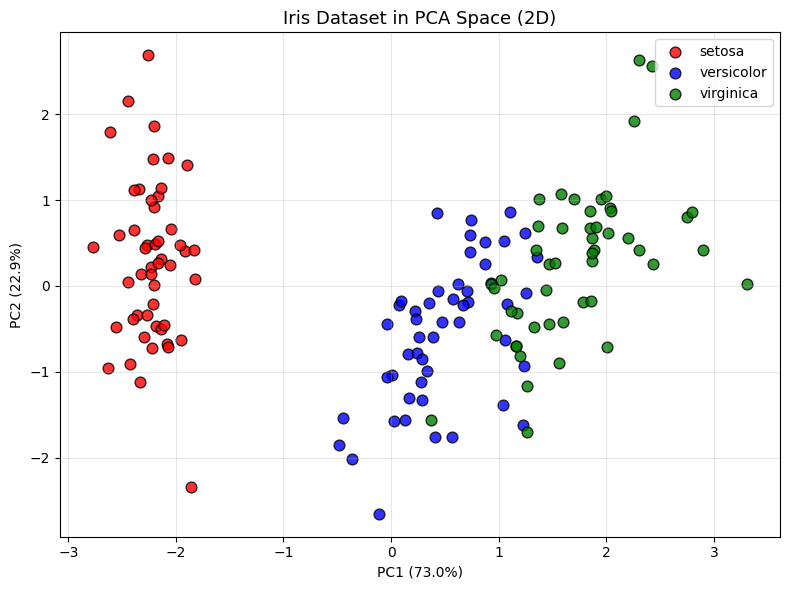

In [60]:
plt.figure(figsize=(8,6))
color = ['red', 'blue', 'green']
labels = iris.target_names  # ['setosa', 'versicolor', 'virginica']

for i in range(3):
    mask = iris.target == i
    plt.scatter(
        X_pca[mask, 0], X_pca[mask, 1],
        c=color[i],
        label=labels[i],       # 범례 이름 추가
        edgecolor='k',         # 점 테두리
        s=60,                  # 점 크기 조금 키우기
        alpha=0.8              # 투명도 조절
    )

# 제목, 축 이름, 격자, 범례 추가
plt.title("Iris Dataset in PCA Space (2D)", fontsize=13)
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


In [61]:
# 각 주성분이 원래 feature에 얼마나 영향을 받는지 확인
pd.DataFrame(
    pca.components_,
    columns=iris.feature_names,
    index=['PC1', 'PC2']
)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
PC1,0.521066,-0.269347,0.580413,0.564857
PC2,0.377418,0.923296,0.024492,0.066942


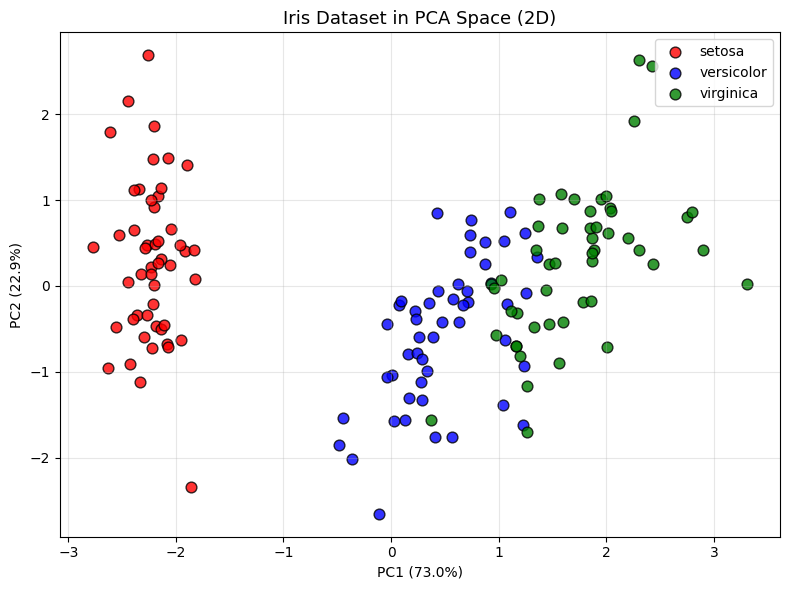

PC1은 petal length, petal width, sepal length가 양의 방향으로 강하게 작용한다.
따라서 꽃 전체의 크기를 대표하는 축으로 해석 가능하다.

PC2는 sepal width(0.92)가 압도적으로 높아서 꽃받침 쪽 변수라고 해석 가능하다.

결국 오른쪽으로 갈수록 꽃 크기가 커지고, 위로 갈수록 꽃받침이 넓다.

즉 PCA는 꽃크기와 꽃받침형태 2가지 축으로 데이터를 압축했다.


# **과제 2: K-Means 최적 K 찾기**

Elbow Method와 Silhouette Score 사용
→ 최적 K 선택 및 결과 비교


In [62]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score    # 군집화의 품질을 평가하기 위한 지표 함수

In [63]:
# 반복적으로 K를 바꿔가며 Inertia(=군집 응집도)와 Silhouette 계산
def scan_k(X, k_min=2, k_max=10, n_init=10, random_state=42):
    inertias = []       # 각 K에서의 군집 내 제곱합 (작을수록 좋음)
    silhouettes = []    # 각 K에서의 실루엣 점수 (클수록 좋음)
    ks = range(k_min, k_max+1)

    for k in ks:
        km = KMeans(n_clusters=k, n_init=n_init, random_state=random_state) # KMeans 모델 생성
        labels = km.fit_predict(X)                      # 학습
        inertias.append(km.inertia_)                    # 응집도 측정값
        silhouettes.append(silhouette_score(X, labels)) # 군집 품질 점수

    return list(ks), inertias, silhouettes

In [64]:
# K=2~10까지 실험
ks, inertias, silhouettes = scan_k(X_scaled, 2, 10)

# 각 K 에서 군집 응집도 값, 각 K 에서 군집 품질 점수
inertias, silhouettes

c:\Users\USER\anaconda3\envs\myenv\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\USER\anaconda3\envs\myenv\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\USER\anaconda3\envs\myenv\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\USER\anaconda3\envs\myenv\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans 

([222.36170496502308,
  139.8204963597498,
  114.0925469040309,
  90.92751382392052,
  81.54439095511783,
  72.63114382667189,
  62.54060569578124,
  55.119492805290605,
  47.39103517634711],
 [0.5817500491982808,
  0.45994823920518635,
  0.38694104154427816,
  0.3459012795948778,
  0.31707940193569023,
  0.3201967939183684,
  0.33869173894897225,
  0.3423598384813203,
  0.3517926760640288])

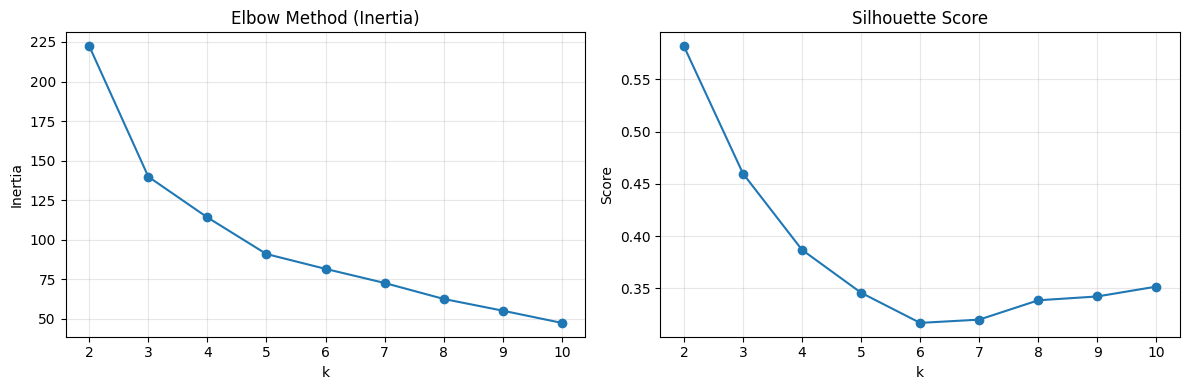

In [65]:
# 시각화: Elbow Plot + Silhouette Plot
fig, ax = plt.subplots(1,2,figsize=(12,4))
ax[0].plot(ks, inertias, marker='o')
ax[0].set_title("Elbow Method (Inertia)")
ax[0].set_xlabel("k"); ax[0].set_ylabel("Inertia"); ax[0].grid(True, alpha=0.3)

ax[1].plot(ks, silhouettes, marker='o')
ax[1].set_title("Silhouette Score")
ax[1].set_xlabel("k"); ax[1].set_ylabel("Score"); ax[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

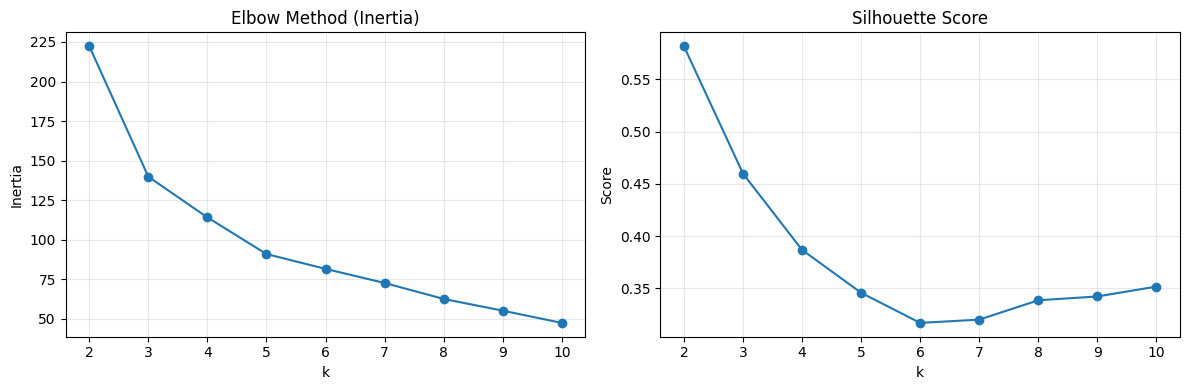

* Elbow Method(Inertia)
K=2->K=3에서 가장 값이 크게 떨어진다. 최적 K = 2

* Silhouette Score
k=2에서 가장 점수가 높다. 최적 K = 2


In [66]:

# 가장 실루엣 점수가 높은 K 선택
best_k = ks[int(np.argmax(silhouettes))]
print("최적 K 값:", best_k)


최적 K 값: 2


In [67]:
# 최적 K로 다시 K-Means 학습
kmeans_best = KMeans(n_clusters=best_k, n_init=10, random_state=42)
labels_best = kmeans_best.fit_predict(X_scaled)

c:\Users\USER\anaconda3\envs\myenv\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [68]:
# 군집 중심 좌표 출력
print(f"\n[ K={best_k} 의 군집 중심 좌표 ]")
print(kmeans_best.cluster_centers_)


[ K=2 의 군집 중심 좌표 ]
[[ 0.50728948 -0.42663134  0.65249366  0.62744675]
 [-1.01457897  0.85326268 -1.30498732 -1.25489349]]


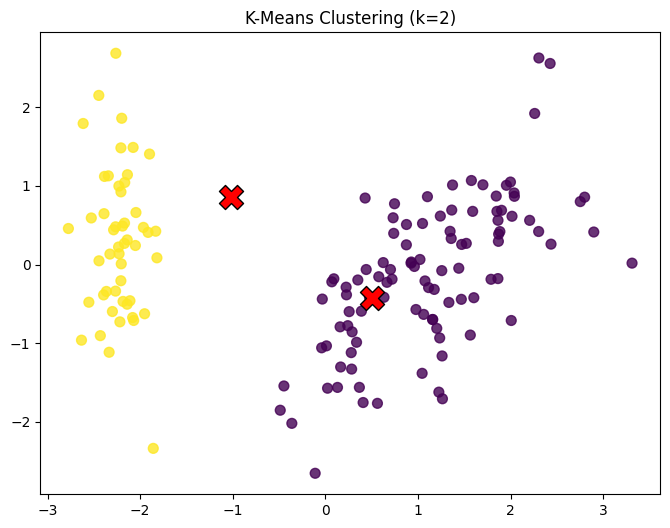

In [69]:
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_best, s=50, cmap='viridis', alpha=0.8)
plt.scatter(
    kmeans_best.cluster_centers_[:, 0],
    kmeans_best.cluster_centers_[:, 1],
    c='red', s=300, marker='X', edgecolors='black'
)
plt.title(f'K-Means Clustering (k={best_k})')
plt.show()


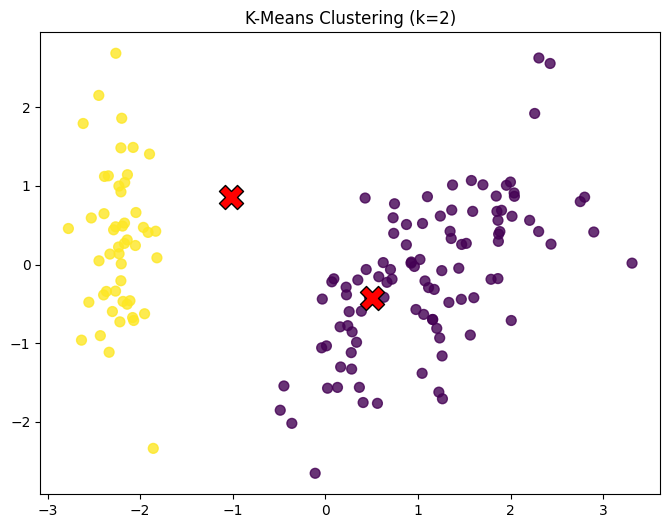

의문점-> 왜 X가 노랑과 멀리 떨어진 것처럼 보일까?

- 점(●): 각 샘플의 PCA 변환 결과 (X_pca)
- X표(❌): K-Means가 원래 데이터(X_scaled) 기준으로 계산한 중심(cluster_centers_)

K-Means는 PCA에서 돌린 게 아니라 X_scaled에서 군집화한 것이라면,
중심 좌표(cluster_centers_)가 원래 4차원 공간의 평균값이기 때문에
2D 평면으로 투영하면 시각적으로 멀리 떨어져 보일 수 있다. 

즉 내가 PCA 스케일링 된 데이터를 가지고 해서 이런 결과가 나온것으로 보임.
스케일링 하지 않고 다시 진행

In [76]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score, normalized_mutual_info_score
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

# 데이터 로드 (스케일링 안 함)
iris = load_iris()
X = iris.data           # (150, 4)
y = iris.target         # 라벨(0=setosa, 1=versicolor, 2=virginica)


In [ ]:
def scan_k_unscaled(X, k_min=2, k_max=10, n_init=10, random_state=42):
    """
    여러 개의 K 값을 바꿔가며 KMeans를 수행하고,
    Inertia(군집 응집도)와 Silhouette(군집 품질 점수)을 계산
    """
    ks, inertias, silhouettes = [], [], []
    
    for k in range(k_min, k_max+1):
        # KMeans 모델 생성
        km = KMeans(n_clusters=k, n_init=n_init, random_state=random_state)
        
        # fit_predict() : 학습 + 예측 동시에 수행
        labels = km.fit_predict(X)
        
        # 군집 응집도 (클수록 점들이 흩어짐 → 작을수록 좋음)
        inertias.append(km.inertia_)
        
        # 실루엣 점수 (1에 가까울수록 잘 분리됨)
        silhouettes.append(silhouette_score(X, labels))
        
        ks.append(k)
    
    return ks, inertias, silhouettes

# 🔹 K = 2~10까지 실험 수행
ks, inertias, silhouettes = scan_k_unscaled(X, 2, 10)




c:\Users\USER\anaconda3\envs\myenv\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\USER\anaconda3\envs\myenv\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\USER\anaconda3\envs\myenv\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\USER\anaconda3\envs\myenv\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans 

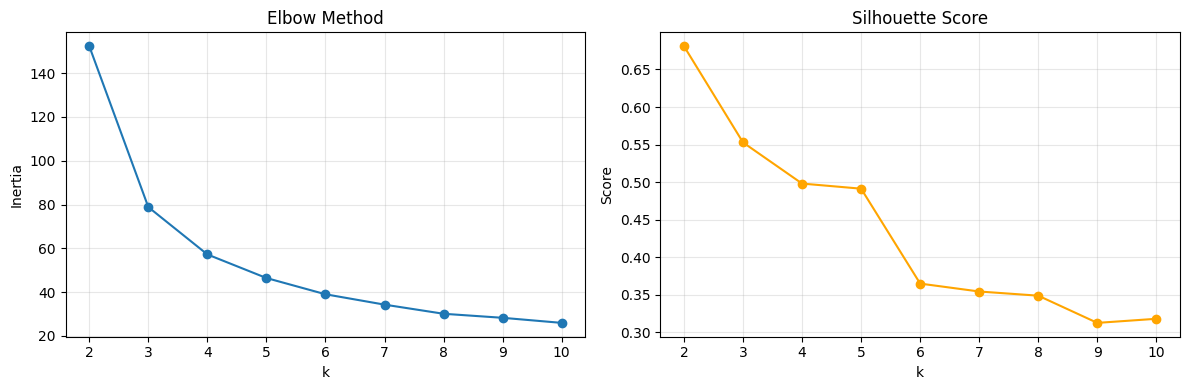

Silhouette 기준 최적 k = 2


In [88]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

# (1) Elbow 그래프
ax[0].plot(ks, inertias, marker='o')
ax[0].set_title('Elbow Method')
ax[0].set_xlabel('k')
ax[0].set_ylabel('Inertia')
ax[0].grid(True, alpha=0.3)

# (2) Silhouette 그래프
ax[1].plot(ks, silhouettes, marker='o', color='orange')
ax[1].set_title('Silhouette Score')
ax[1].set_xlabel('k')
ax[1].set_ylabel('Score')
ax[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 🔹 Silhouette이 가장 높은 K값 선택
best_k = ks[int(np.argmax(silhouettes))]
print(f"Silhouette 기준 최적 k = {best_k}")


In [109]:
kmeans_raw = KMeans(n_clusters=best_k, n_init=10, random_state=42)
labels_raw = kmeans_raw.fit_predict(X)

print("\n[군집 중심 좌표]")
print("(순서: sepal length, sepal width, petal length, petal width)\n")
print(np.round(kmeans_raw.cluster_centers_, 3))   # 각 군집의 평균값(=중심)

print("\n[모델 평가 지표]")
print(f"Inertia (응집도): {kmeans_raw.inertia_:.2f}")
print(f"Silhouette (분리도): {silhouette_score(X, labels_raw):.3f}")




[군집 중심 좌표]
(순서: sepal length, sepal width, petal length, petal width)

[[6.301 2.887 4.959 1.696]
 [5.006 3.37  1.56  0.291]]

[모델 평가 지표]
Inertia (응집도): 152.35
Silhouette (분리도): 0.681


c:\Users\USER\anaconda3\envs\myenv\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[군집 중심 좌표]
(순서: sepal length, sepal width, petal length, petal width)
(순서: 꽃받침 길이, 꽃받침 폭, 꽃잎 길이, 꽃잎 폭)
[[6.301 2.887 4.959 1.696]
 [5.006 3.37  1.56  0.291]]

cluster 0 : 꽃잎이 길고 넓음. 꽃받침도 조금 긴편
cluster 1 : 꽃잎이 짧고 폭도 좁은 편


[모델 평가 지표]

Inertia (응집도): 152.35 -> (0 ~ ∞) 작을수록 좋음. / 군집 내부 점들이 얼마나 뭉쳐 있는가 (응집도)
Silhouette (분리도): 0.681 -> (-1~1) 클수록 좋음. / 군집 간 분리가 얼마나 명확한가 (분리도 + 응집도)

응집도도 좋고 분리도도 좋은 이상적인 결과다.




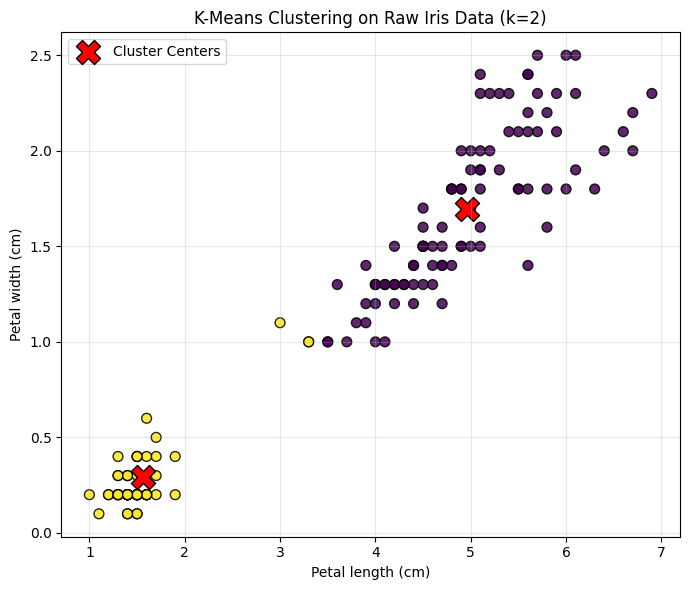

In [ ]:
#  Iris 데이터는 꽃잎 길이/너비가 종 구분에 가장 큰 영향을 줌
plt.figure(figsize=(7, 6))

# 각 점을 군집 색으로 표시
plt.scatter(
    X[:, 2], X[:, 3],
    c=labels_raw, s=50,
    cmap='viridis', alpha=0.85, edgecolors='k'
)

# 군집 중심 표시 (petal length & width 기준)
centers = kmeans_raw.cluster_centers_
plt.scatter(
    centers[:, 2], centers[:, 3],
    c='red', s=300, marker='X', edgecolors='black', label='Cluster Centers'
)

plt.xlabel('Petal length (cm)')
plt.ylabel('Petal width (cm)')
plt.title(f'K-Means Clustering on Raw Iris Data (k={best_k})')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

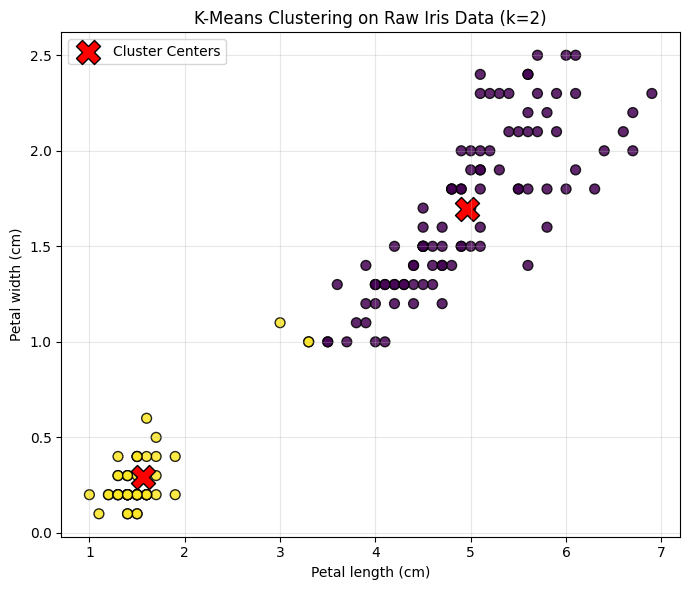

X축 = 꽃잎 길이
Y축 = 꽃잎 너비
이 두 특성이 Iris 품종을 구분하는 데 가장 큰 영향을 준다.


# **과제 3: 알고리즘 비교**

같은 데이터로 K-Means와 Hierarchical 실행
→ 결과와 성능 비교 분석


In [93]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

iris = load_iris()
X = iris.data           # (150,4) — sepal length, sepal width, petal length, petal width
y = iris.target         # 실제 품종 레이블
print("데이터 형태:", X.shape)

데이터 형태: (150, 4)


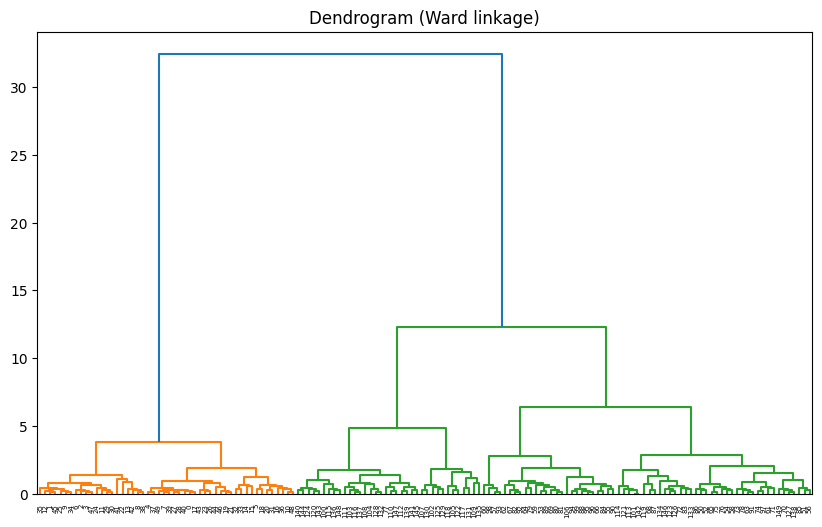

In [102]:
from scipy.cluster.hierarchy import linkage, dendrogram

# linkage(): 군집 간 병합 정보를 계산
# method='ward' → 군집 합칠 때 SSE(제곱오차합) 증가가 최소가 되도록
Z = linkage(X, method='ward')

plt.figure(figsize=(10, 6))
dendrogram(Z)
plt.title("Dendrogram (Ward linkage)")
plt.show()

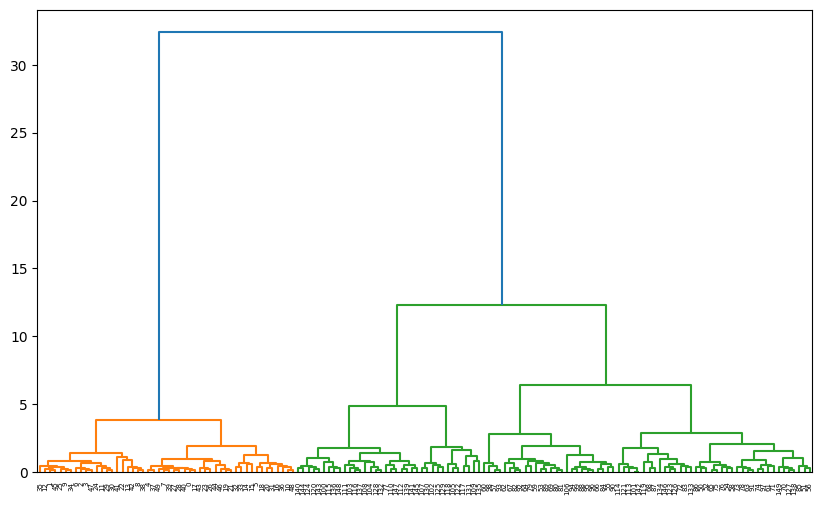

K=2 or K=3 둘 중 하나를 선택할 수 있다.

In [107]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering

for k in [2, 3]:
    model = AgglomerativeClustering(n_clusters=k, linkage='ward')
    labels = model.fit_predict(X)
    sil = silhouette_score(X, labels)
    print(f"k={k}, silhouette={sil:.3f}")


k=2, silhouette=0.687
k=3, silhouette=0.554


k=2, silhouette=0.687
k=3, silhouette=0.554

1에 가까울수록 군집이 명확한데 k=2일때 군집이 더 명확하다.

[K-means 모델 평가 지표]
Inertia (응집도): 152.35
Silhouette (분리도): 0.681

[Hierarchical (Ward) 모델 평가 지표]
Silhouette (분리도): 0.687

두 모델이 비슷한 Silhouette 값이 나온다.
둘 모두 거리를 기반으로 측정하는 알고리즘이기 때문이다.
iris처럼 단순한 데이터에서는 두 모델이 비슷한 결과를 보인다.
